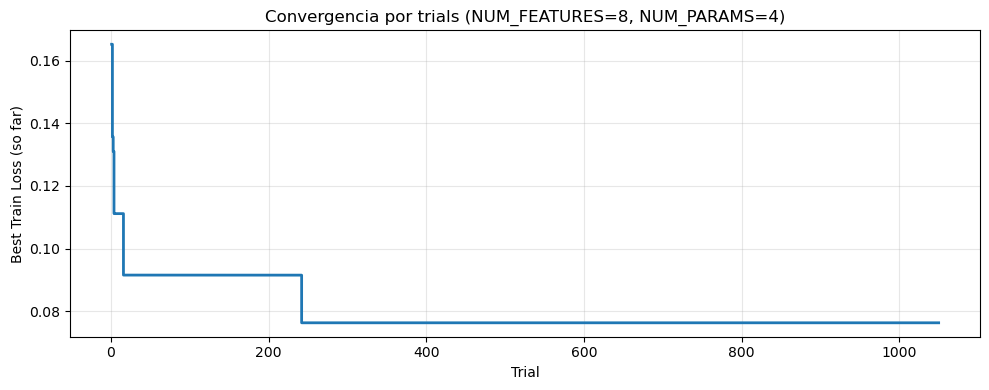

In [27]:
import glob, pandas as pd
import matplotlib.pyplot as plt

BASE_SAVE_DIR = "/Users/ccristiano/Documents/Codigos/QML/MNIST/qutrit/data/prueba/desde3layers"
NUM_FEATURES = 8
NUM_PARAMS   = 4
LAYERS       = 3

# Cargar y concatenar todos los chunks
files = sorted(glob.glob(f"{BASE_SAVE_DIR}/train_progress_NUMFEATURES_{NUM_FEATURES}_NUM_PARAMS_{NUM_PARAMS}_*.csv"))
df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)

# Asegurar orden por Trial y recomputar best-so-far por seguridad
df = df.sort_values("Trial").reset_index(drop=True)
df["BestSoFar"] = df["BestTrainLoss"].cummin()

plt.figure(figsize=(10,4))
plt.plot(df["Trial"], df["BestSoFar"], drawstyle="steps-post", linewidth=2)
plt.xlabel("Trial")
plt.ylabel("Best Train Loss (so far)")
plt.title(f"Convergencia por trials (NUM_FEATURES={NUM_FEATURES}, NUM_PARAMS={NUM_PARAMS})")
plt.grid(True, alpha=0.3)
# plt.xlim(0, 100)
plt.tight_layout()
plt.show()


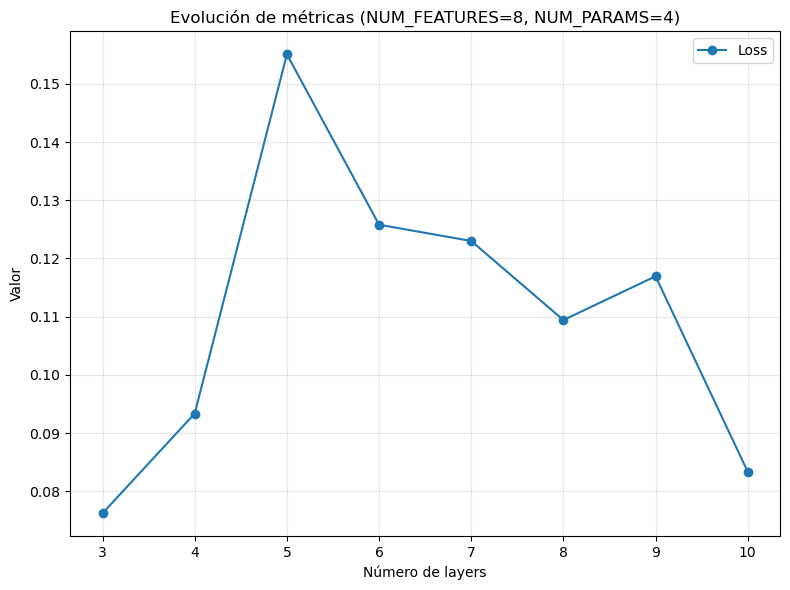

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import glob, re

BASE_SAVE_DIR = "/Users/ccristiano/Documents/Codigos/QML/MNIST/qutrit/data/prueba/desde3layers"
NUM_FEATURES = 8
NUM_PARAMS = 4

# Buscar todos los archivos de métricas que siguen el patrón
files = sorted(glob.glob(f"{BASE_SAVE_DIR}/metrics_NUMFEATURES_{NUM_FEATURES}_NUM_PARAMS_{NUM_PARAMS}_LAYERS_*.csv"))

# Extraer número de layers de cada archivo y cargar
records = []
for f in files:
    m = re.search(r"LAYERS_(\d+)", f)
    if not m:
        continue
    layers = int(m.group(1))
    df = pd.read_csv(f)
    records.append({
        "Layers": layers,
        "Loss": df["FinalTrainLossAvg"].iloc[0],       
        "TrainAcc": df["TrainAcc"].iloc[0],
        "TestAcc": df["TestAcc"].iloc[0],
    })

df_all = pd.DataFrame(records).sort_values("Layers")

# Plot
plt.figure(figsize=(8,6))
plt.plot(df_all["Layers"], df_all["Loss"], marker="o", label="Loss")
# plt.plot(df_all["Layers"], df_all["TrainAcc"], marker="o", label="Train Accuracy")
# plt.plot(df_all["Layers"], df_all["TestAcc"], marker="o", label="Test Accuracy")

plt.xlabel("Número de layers")
plt.ylabel("Valor")
plt.title(f"Evolución de métricas (NUM_FEATURES={NUM_FEATURES}, NUM_PARAMS={NUM_PARAMS})")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


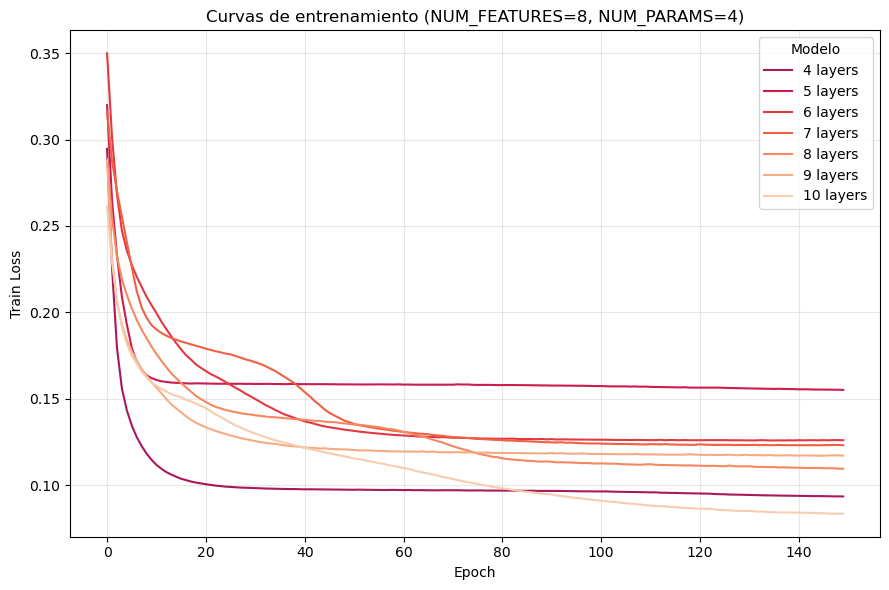

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import glob, re

import seaborn as sns

BASE_SAVE_DIR = "/Users/ccristiano/Documents/Codigos/QML/MNIST/qutrit/data/prueba/desde3layers"
NUM_FEATURES = 8
NUM_PARAMS   = 4

# Cargar curvas de loss para cada número de layers
records = {}

for f in sorted(glob.glob(f"{BASE_SAVE_DIR}/loss_curve_NUMFEATURES_{NUM_FEATURES}_NUM_PARAMS_{NUM_PARAMS}_LAYERS_*.csv")):
    m = re.search(r"LAYERS_(\d+)", f)
    if not m:
        continue
    layers = int(m.group(1))
    df = pd.read_csv(f)
    records[layers] = df

# Graficar
palette = sns.color_palette("rocket", 11)

plt.figure(figsize=(9,6))
for layers, df in sorted(records.items()):
    plt.plot(df["Epoch"], df["TrainLossAvg"], label=f"{layers} layers", color=palette[layers])

plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title(f"Curvas de entrenamiento (NUM_FEATURES={NUM_FEATURES}, NUM_PARAMS={NUM_PARAMS})")
plt.legend(title="Modelo")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [42]:
records[5]["TrainLossAvg"]

0      0.319964
1      0.264736
2      0.232995
3      0.208989
4      0.192988
         ...   
145    0.155256
146    0.155239
147    0.155205
148    0.155177
149    0.155064
Name: TrainLossAvg, Length: 150, dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob, re

BASE_SAVE_DIR = "/Users/ccristiano/Documents/Codigos/QML/MNIST/qutrit/data/prueba"
NUM_FEATURES = 8
NUM_PARAMS = 4

# Buscar todos los archivos de métricas que siguen el patrón
files = sorted(glob.glob(f"{BASE_SAVE_DIR}/metrics_NUMFEATURES_{NUM_FEATURES}_NUM_PARAMS_{NUM_PARAMS}_LAYERS_*.csv"))

# Extraer número de layers de cada archivo y cargar
records = []
for f in files:
    m = re.search(r"LAYERS_(\d+)", f)
    if not m:
        continue
    layers = int(m.group(1))
    df = pd.read_csv(f)
    records.append({
        "Layers": layers,
        "Loss": df["FinalTrainLossAvg"].iloc[0],           # <- ajusta si en tu CSV el nombre es distinto
        "TrainAcc": df["TrainAcc"].iloc[0],
        "TestAcc": df["TestAcc"].iloc[0],
    })

df_all = pd.DataFrame(records).sort_values("Layers")

# Plot
plt.figure(figsize=(8,6))
plt.plot(df_all["Layers"], df_all["Loss"], marker="o", label="Loss")
# plt.plot(df_all["Layers"], df_all["TrainAcc"], marker="o", label="Train Accuracy")
# plt.plot(df_all["Layers"], df_all["TestAcc"], marker="o", label="Test Accuracy")

plt.xlabel("Número de layers")
plt.ylabel("Valor")
plt.title(f"Evolución de métricas (NUM_FEATURES={NUM_FEATURES}, NUM_PARAMS={NUM_PARAMS})")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

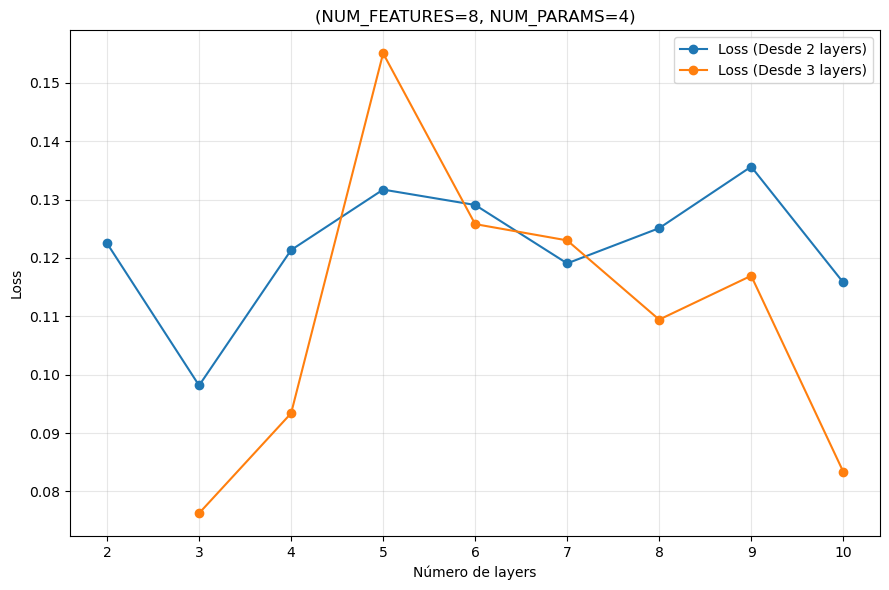

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import glob, re

BASE_DIRS = {
    "Desde 2 layers": "/Users/ccristiano/Documents/Codigos/QML/MNIST/qutrit/data/prueba/desde2layers",
    "Desde 3 layers": "/Users/ccristiano/Documents/Codigos/QML/MNIST/qutrit/data/prueba/desde3layers",
}

NUM_FEATURES = 8
NUM_PARAMS   = 4

def load_metrics(path, label):
    files = sorted(glob.glob(f"{path}/metrics_NUMFEATURES_{NUM_FEATURES}_NUM_PARAMS_{NUM_PARAMS}_LAYERS_*.csv"))
    records = []
    for f in files:
        m = re.search(r"LAYERS_(\d+)", f)
        if not m:
            continue
        layers = int(m.group(1))
        df = pd.read_csv(f)
        records.append({
            "Layers": layers,
            "Loss": df["Loss"].iloc[0] if "Loss" in df else df["FinalTrainLossAvg"].iloc[0],
            "TrainAcc": df["TrainAcc"].iloc[0],
            "TestAcc": df["TestAcc"].iloc[0],
        })
    return pd.DataFrame(records).sort_values("Layers").assign(Run=label)

# Cargar ambas secuencias
dfs = [load_metrics(path, label) for label, path in BASE_DIRS.items()]
df_all = pd.concat(dfs, ignore_index=True)

# Plot
plt.figure(figsize=(9,6))

for run in df_all["Run"].unique():
    sub = df_all[df_all["Run"] == run]
    plt.plot(sub["Layers"], sub["Loss"], marker="o", label=f"Loss ({run})")
    # plt.plot(sub["Layers"], sub["TrainAcc"], marker="s", label=f"Train Acc ({run})")
    # plt.plot(sub["Layers"], sub["TestAcc"], marker="^", label=f"Test Acc ({run})")

plt.xlabel("Número de layers")
plt.ylabel("Loss")
plt.title(f"(NUM_FEATURES={NUM_FEATURES}, NUM_PARAMS={NUM_PARAMS})")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
